# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [221]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [222]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [223]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


In [224]:
pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8, pos9 = [], [], [], [], [], [], [], [], [], []  
for i in range(Y.size):
    if Y[i] == '0':
        pos0.append(i)
    elif Y[i] == '1':
        pos1.append(i)
    elif Y[i] == '2':
        pos2.append(i)
    elif Y[i] == '3':
        pos3.append(i)
    elif Y[i] == '4':
        pos4.append(i)
    elif Y[i] == '5':
        pos5.append(i)
    elif Y[i] == '6':
        pos6.append(i)
    elif Y[i] == '7':
        pos7.append(i)
    elif Y[i] == '8':
        pos8.append(i)
    elif Y[i] == '9':
        pos9.append(i)
        
        
pick0 = np.random.randint(len(pos0), size=10)
pick1 = np.random.randint(len(pos1), size=10)
pick2 = np.random.randint(len(pos2), size=10)
pick3 = np.random.randint(len(pos3), size=10)
pick4 = np.random.randint(len(pos4), size=10)
pick5 = np.random.randint(len(pos5), size=10)
pick6 = np.random.randint(len(pos6), size=10)
pick7 = np.random.randint(len(pos7), size=10)
pick8 = np.random.randint(len(pos8), size=10)
pick9 = np.random.randint(len(pos9), size=10)

for i in range(10):
    pick0[i] = pos0[i]
    pick1[i] = pos1[i]
    pick2[i] = pos2[i]
    pick3[i] = pos3[i]
    pick4[i] = pos4[i]
    pick5[i] = pos5[i]
    pick6[i] = pos6[i]
    pick7[i] = pos7[i]
    pick8[i] = pos8[i]
    pick9[i] = pos9[i]

x0, x1, x2, x3, x4, x5, x6, x7, x8, x9 = [], [], [], [], [], [], [], [], [], []  

for i in range(10):
    x0.append(np.reshape(X[pick0[i]], (28,28)))
    x1.append(np.reshape(X[pick1[i]], (28,28)))
    x2.append(np.reshape(X[pick2[i]], (28,28)))
    x3.append(np.reshape(X[pick3[i]], (28,28)))
    x4.append(np.reshape(X[pick4[i]], (28,28)))
    x5.append(np.reshape(X[pick5[i]], (28,28)))
    x6.append(np.reshape(X[pick6[i]], (28,28)))
    x7.append(np.reshape(X[pick7[i]], (28,28)))
    x8.append(np.reshape(X[pick8[i]], (28,28)))
    x9.append(np.reshape(X[pick9[i]], (28,28)))


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

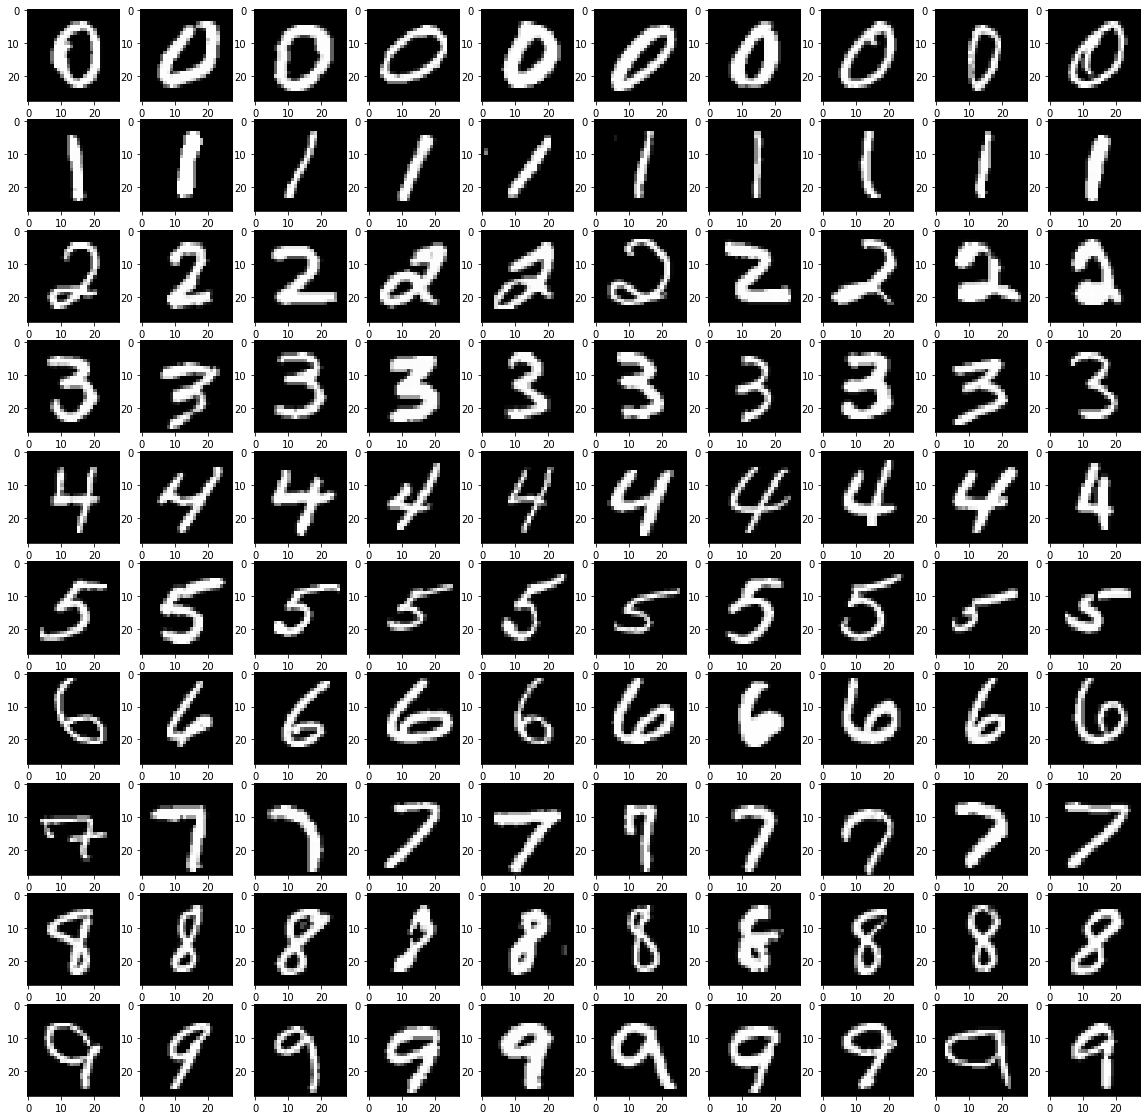

In [225]:
def P1(num_examples=10):

### STUDENT START ###
    plt.figure(figsize=(20, 20))
    for i in range (1,num_examples * num_examples + 1):
        plt.subplot(num_examples, num_examples, i)
        if i <= 10:
            plt.imshow(x0.pop(0))
            plt.rc('image', cmap='gray')
            continue
        if i <= 20:
            plt.imshow(x1.pop(0))
            plt.rc('image', cmap='gray')            
            continue
        if i <= 30:
            plt.imshow(x2.pop(0))
            plt.rc('image', cmap='gray')
            continue
        if i <= 40:
            plt.imshow(x3.pop(0))  
            plt.rc('image', cmap='gray')
            continue
        if i <= 50:
            plt.imshow(x4.pop(0)) 
            plt.rc('image', cmap='gray')
            continue
        if i <= 60:
            plt.imshow(x5.pop(0))
            plt.rc('image', cmap='gray')
            continue
        if i <= 70:
            plt.imshow(x6.pop(0))
            plt.rc('image', cmap='gray')
            continue
        if i <= 80:
            plt.imshow(x7.pop(0)) 
            plt.rc('image', cmap='gray')
            continue
        if i <= 90:
            plt.imshow(x8.pop(0))
            plt.rc('image', cmap='gray')
            continue
        else:
            plt.imshow(x9.pop(0)) 
            plt.rc('image', cmap='gray')

#         plt.rc('image', cmap='gray')


### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [226]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(mini_train_data, mini_train_labels)

        if (i == 1):
            y_pred = neigh.predict(dev_data)
            y_true = dev_labels
            print("The following is a classification report for 1 Nearest Neighbour.")
            print(classification_report(y_true, y_pred))
        else:
            print("The following is the results for " + str(i) + " neighbour")
            neigh.fit(mini_train_data, mini_train_labels)
            predictions = neigh.predict(dev_data)
#             print(neigh.score(dev_data, dev_labels))
# 
            correct = predictions == dev_labels
            print("The following is the average correct predictions using this model for all digits")
            print(np.average(correct))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

The following is a classification report for 1 Nearest Neighbour.
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

The following is the results for 3 neighbour
The following is the average correct predictions using this model for all digits
0.876
The following is the results for 5 neighbou

ANSWER: We see for N = 1, the average accuracy for classifying all digits is 0.88, and the model most accurately predicts the number 0 with accurcy 0.95, and the least accurately predicts the number 9 with accuracy 0.8. We can see this in the classification report above. f1 score is 0.88, and recall is 0.88. The most difficult digit for 1-Nearest Neighbour to classify is 9 because the precision is 0.80, the lowest of all digits for K=1. 

For N = 3, the model best predicts the numbers 0 and 5 equally well with accuracy 0.94, and least accurerately predicts the number 1 with accuracy 0.82. The average accuracy of the model in predicting dev data digits is 0.876 for all digits in the dev set. 

For N = 5,  the model best predicts the numbers 2 and 5 equally well with accuracy 0.96, and least accurerately predicts the number 7 with accuracy 0.8.The average accuracy of the model in predicting dev data digits is 0.882 for all digits in the dev set. 

For N = 7, the model best predicts the numbers 0, 2, and 5 equally well with accuracy 0.96, and least accurerately predicts the numbers 1 and 7 with accuracy 0.8. The average accuracy of the model in predicting dev data digits is 0.877 for all digits in the dev set. 

For N = 9, the model best predicts the number 2  with accuracy 0.97, and least accurerately predicts the number 1 with accuracy 0.78.The average accuracy of the model in predicting dev data digits is 0.875 for all digits in the dev set. 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [227]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    index = 0
    for i in train_sizes:
        train_subset_data = train_data[:i]
        train_subset_labels = train_labels[:i]
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(train_subset_data, train_subset_labels)

        y_pred = neigh.predict(dev_data)
        y_true = dev_labels
        print("The accuracy for train set subset of size " + str(i) + " is ")
        time_present = time.time()
        accuracy = neigh.score(dev_data, dev_labels)
        time_future = time.time()
        print(str(accuracy) + ".")        
        time_diff = time_future - time_present
        print("Time needed to measure performance for subset size " + str(i) + " is: " + str(time_diff) + " seconds.")
        print(" ")
        accuracies.append(accuracy)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

The accuracy for train set subset of size 100 is 
0.702.
Time needed to measure performance for subset size 100 is: 0.11258983612060547 seconds.
 
The accuracy for train set subset of size 200 is 
0.791.
Time needed to measure performance for subset size 200 is: 0.2028031349182129 seconds.
 
The accuracy for train set subset of size 400 is 
0.811.
Time needed to measure performance for subset size 400 is: 0.4016869068145752 seconds.
 
The accuracy for train set subset of size 800 is 
0.866.
Time needed to measure performance for subset size 800 is: 0.8018696308135986 seconds.
 
The accuracy for train set subset of size 1600 is 
0.905.
Time needed to measure performance for subset size 1600 is: 1.6724343299865723 seconds.
 
The accuracy for train set subset of size 3200 is 
0.927.
Time needed to measure performance for subset size 3200 is: 3.8801429271698 seconds.
 
The accuracy for train set subset of size 6400 is 
0.939.
Time needed to measure performance for subset size 6400 is: 7.37

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

R^2 value of reg1 is: 0.4177006634161019
Accuracies found using Linear Reg Model 1 for subset sizes 60000, 120000, 1000000, respectively are: 1.2361731707874237, 1.637428053637104, 1.2361731707874237
R^2 value of reg2 is: -27458616.92798783
Accuracies found using Linear Reg Model 2 for subset sizes 60000, 120000, 1000000, respectively are: 1.0335879166434623, 1.0643212499767956, 1.0335879166434623
R^2 value of reg3 is: -22309.937887444037
Accuracies found using Linear Reg Model 3 for subset sizes 60000, 120000, 1000000, respectively are: 0.9832927097569462, 0.9911143865080189, 0.9832927097569462
R^2 value of reg4 is: -236997172237.6681
Accuracies found using Linear Reg Model 4 for subset sizes 60000, 120000, 1000000, respectively are: 0.9630701660900399, 0.9665919573218424, 0.9630701660900399


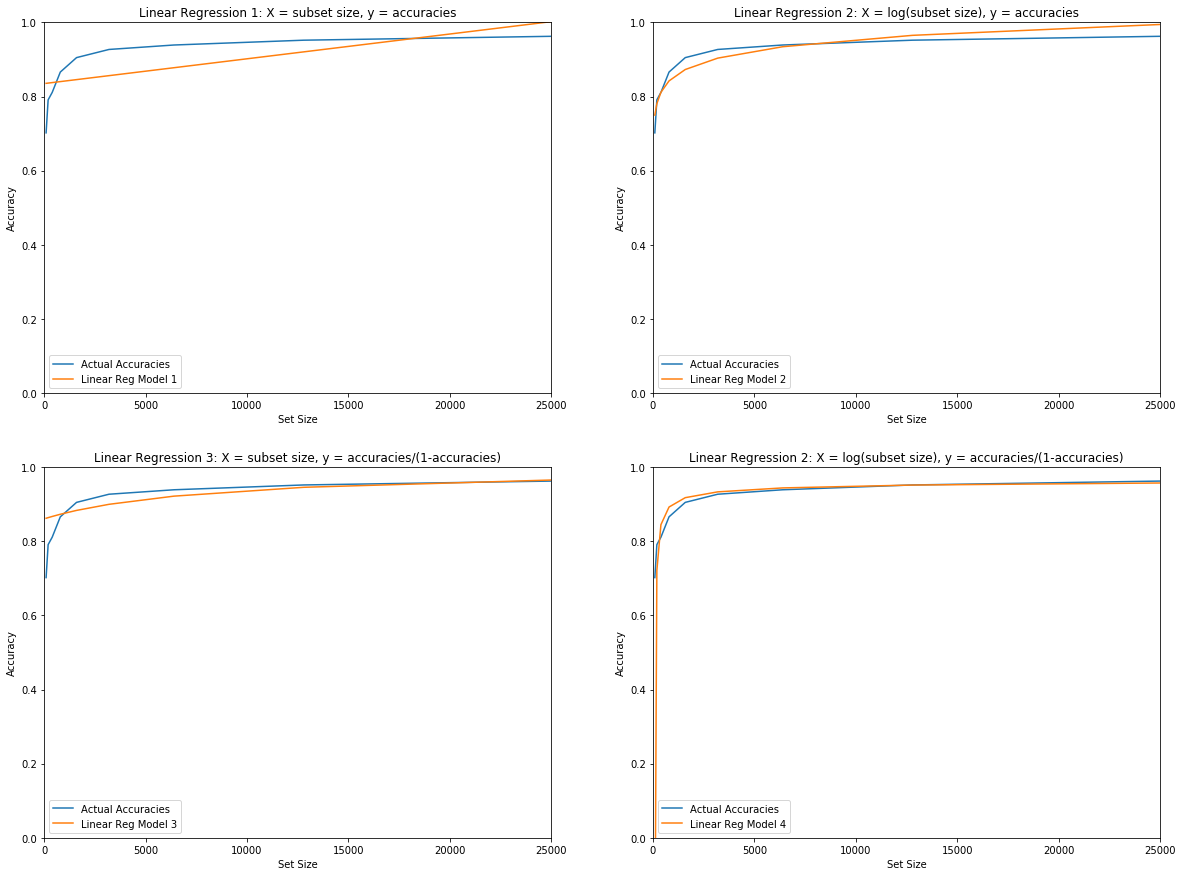

In [228]:
def P4():

### STUDENT START ###
    X = np.array(train_sizes)
    X = X.reshape(-1, 1)
    y = np.array(accuracies)
    y_log = y/(1-y)
    Xs = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]).reshape(-1, 1)

    reg1 = LinearRegression().fit(X, y)
    print("R^2 value of reg1 is: " + str(reg1.score(X, y)))
    pred1 = reg1.predict(Xs)
    accuracy1_6 = pred1[9]
    accuracy1_12 = pred1[10]
    accuracy1_10 = pred1[11]
    print("Accuracies found using Linear Reg Model 1 for subset sizes 60000, 120000, 1000000, respectively are: " + str(accuracy1_6) + ", " + str(accuracy1_12) + ", " + str(accuracy1_6))

    
    reg2 = LinearRegression().fit(np.log(X), y)
    print("R^2 value of reg2 is: " + str(reg2.score(X, y)))
    pred2 = reg2.predict(np.log(Xs))
    accuracy2_6 = pred2[9]
    accuracy2_12 = pred2[10]
    accuracy2_10 = pred2[11]
    print("Accuracies found using Linear Reg Model 2 for subset sizes 60000, 120000, 1000000, respectively are: " + str(accuracy2_6) + ", " + str(accuracy2_12) + ", " + str(accuracy2_6))

    
    reg3 = LinearRegression().fit(X, y_log)
    print("R^2 value of reg3 is: " + str(reg3.score(X, y)))
    pred3 = reg3.predict(Xs)
    pred3 = pred3/(pred3+1)
    accuracy3_6 = pred3[9]
    accuracy3_12 = pred3[10]
    accuracy3_10 = pred3[11]
    print("Accuracies found using Linear Reg Model 3 for subset sizes 60000, 120000, 1000000, respectively are: " + str(accuracy3_6) + ", " + str(accuracy3_12) + ", " + str(accuracy3_6))

    
    reg4 = LinearRegression().fit(np.log(X), y_log)
    print("R^2 value of reg4 is: " + str(reg4.score(X, y)))
    pred4 = reg4.predict(np.log(Xs))
    pred4 = pred4/(pred4+1) 
    accuracy4_6 = pred4[9]
    accuracy4_12 = pred4[10]
    accuracy4_10 = pred4[11]
    print("Accuracies found using Linear Reg Model 4 for subset sizes 60000, 120000, 1000000, respectively are: " + str(accuracy4_6) + ", " + str(accuracy4_12) + ", " + str(accuracy4_6))

    
    fig,ax = plt.subplots(2,2, figsize=(20,15))
    ax[0,0].plot(X, y, label="Actual Accuracies")
    ax[0,0].plot(Xs, pred1, label="Linear Reg Model 1")
    ax[0,0].set_xlim([0,25000])
    ax[0,0].set_ylim([0,1])
    ax[0,0].legend()
    ax[0,0].set_title("Linear Regression 1: X = subset size, y = accuracies")
    ax[0,0].set_xlabel("Set Size")
    ax[0,0].set_ylabel("Accuracy")

    
    ax[0,1].plot(X, y, label="Actual Accuracies")
    ax[0,1].plot(Xs, pred2, label="Linear Reg Model 2")
    ax[0,1].set_xlim([0,25000])
    ax[0,1].set_ylim([0,1])
    ax[0,1].legend()
    ax[0,1].set_title("Linear Regression 2: X = log(subset size), y = accuracies")
    ax[0,1].set_xlabel("Set Size")
    ax[0,1].set_ylabel("Accuracy")

    
    ax[1,0].plot(X, y, label="Actual Accuracies")
    ax[1,0].plot(Xs, pred3, label="Linear Reg Model 3")
    ax[1,0].set_xlim([0,25000])
    ax[1,0].set_ylim([0,1])
    ax[1,0].legend()
    ax[1,0].set_title("Linear Regression 3: X = subset size, y = accuracies/(1-accuracies)")
    ax[1,0].set_xlabel("Set Size")
    ax[1,0].set_ylabel("Accuracy")

    
    ax[1,1].plot(X, y, label="Actual Accuracies")
    ax[1,1].plot(Xs, pred4, label="Linear Reg Model 4")
    ax[1,1].set_xlim([0,25000])
    ax[1,1].set_ylim([0,1])
    ax[1,1].legend()
    ax[1,1].set_title("Linear Regression 2: X = log(subset size), y = accuracies/(1-accuracies)")
    ax[1,1].set_xlabel("Set Size")
    ax[1,1].set_ylabel("Accuracy")


### STUDENT END ###

P4()

ANSWER: R^2 value of reg1 is: 0.4177006634161019.

Accuracies found using Linear Reg Model 1 for subset sizes 60000, 120000, 1000000, respectively are: 1.2361731707874237, 1.637428053637104, 1.2361731707874237.

R^2 value of reg2 is: -27458616.92798783.
Accuracies found using Linear Reg Model 2 for subset sizes 60000, 120000, 1000000, respectively are: 1.0335879166434623, 1.0643212499767956, 1.0335879166434623.

R^2 value of reg3 is: -22309.937887444037.
Accuracies found using Linear Reg Model 3 for subset sizes 60000, 120000, 1000000, respectively are: 0.9832927097569462, 0.9911143865080189, 0.9832927097569462.

R^2 value of reg4 is: -236997172237.6681.
Accuracies found using Linear Reg Model 4 for subset sizes 60000, 120000, 1000000, respectively are: 0.9630701660900399, 0.9665919573218424, 0.9630701660900399.


### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


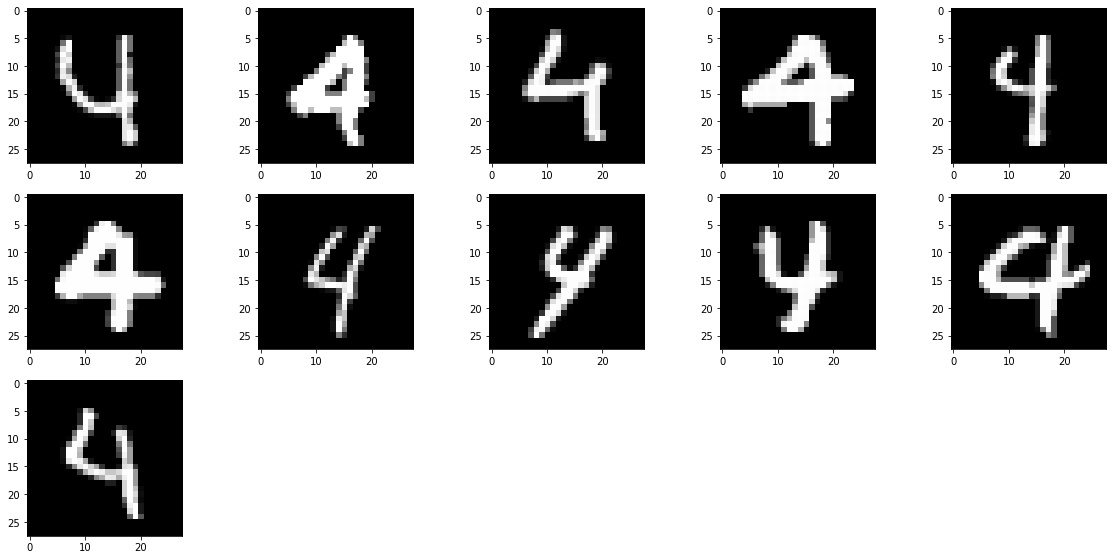

In [229]:
def P5():

### STUDENT START ###

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(mini_train_data, mini_train_labels)
    y_pred = neigh.predict(dev_data)
    y_true = dev_labels
    confusion = confusion_matrix(y_true, y_pred)
    print(confusion)
    
    x_4 = []
    for i in range(len(mini_train_labels)):
        if dev_labels[i] == '4':
            if y_pred[i] == '9':
                x_4.append(dev_data[i])
    for i in range(len(x_4)):
        x_4[i] = np.reshape(x_4[i], (28,28))

    plt.figure(figsize=(20, 20))
    for i in range(0, 11):
        plt.subplot(6, 5, i+1)
        plt.imshow(x_4[i])
        plt.rc('image', cmap='gray')
        
### STUDENT END ###

P5()

ANSWER: (4, 9), meaning when y_true is 4, but the model predicts 9 is the most common confusion. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [251]:
def filtered(data, f):
    reshaped_data = []
    ret_data = data.copy()
    for i in range(data.shape[0]):
        image = data[i]
        reshaped_image = np.reshape(image, (28, 28))
        reshaped_and_padded_image = np.pad(reshaped_image, pad_width=1, mode='constant', constant_values=0)
        reshaped_data.append(reshaped_and_padded_image)
    for i in range(len(reshaped_data)):
        image = reshaped_data[i]
        index = 0
        for row in range (0, image.shape[0] -2):
            for col in range(0, image.shape[0] -2):
                image_section = image[row:row+3, col:col+3]
                image_section = np.array(image_section)
                s = np.sum(f * image_section)
                ret_data[i][index] = s
                index += 1
    return ret_data

def P6():
    
### STUDENT START ###
    filter_average = np.array(1/9 * np.ones((3,3)))
    of = 1/40
    filter_gaussian = np.array([[of, of, of], [of, 4/5, of], [of, of, of]])
    filtered_mini_train_data = filtered(mini_train_data, filter_average)
    filtered_dev_data = filtered(dev_data, filter_average)
    
    filtered_mini_train_data_gaussian = filtered(mini_train_data, filter_gaussian)
    filtered_dev_data_gaussian = filtered(dev_data, filter_gaussian)
    
    print("Below are the accuracies for the four KNN models using an average of all 9 grayscale values using equal weights. We can see the greatest accuracy is for the model using filtered train and unfiltered dev sets:")

    neigh1 = KNeighborsClassifier(n_neighbors=1)
    neigh1.fit(mini_train_data, mini_train_labels)
    y_pred1 = neigh1.predict(dev_data)
    y_true1 = dev_labels
    y_acc1 = y_pred1 == y_true1
    acc1 = np.average(y_acc1)
    print(acc1)
    
    neigh2 = KNeighborsClassifier(n_neighbors=1)
    neigh2.fit(filtered_mini_train_data, mini_train_labels)
    y_pred2 = neigh2.predict(dev_data)
    y_true2 = dev_labels
    y_acc2 = y_pred2 == y_true2
    acc2 = np.average(y_acc2)
    print(acc2)
    
    neigh3 = KNeighborsClassifier(n_neighbors=1)
    neigh3.fit(mini_train_data, mini_train_labels)
    y_pred3 = neigh3.predict(filtered_dev_data)
    y_true3 = dev_labels
    y_acc3 = y_pred3 == y_true3
    acc3 = np.average(y_acc3)
    print(acc3)
    
    neigh4 = KNeighborsClassifier(n_neighbors=1)
    neigh4.fit(filtered_mini_train_data, mini_train_labels)
    y_pred4 = neigh4.predict(filtered_dev_data)
    y_true4 = dev_labels
    y_acc4 = y_pred4 == y_true4
    acc4 = np.average(y_acc4)
    print(acc4)
    
    
    print("Below are the accuracies for the four KNN models using a weight of 0.8 for the center pixel. We can see the greatest accuracy is for the model using filtered train and dev sets:")
    
    
    neigh5 = KNeighborsClassifier(n_neighbors=1)
    neigh5.fit(mini_train_data, mini_train_labels)
    y_pred5 = neigh5.predict(dev_data)
    y_true5 = dev_labels
    y_acc5 = y_pred5 == y_true5
    acc5 = np.average(y_acc5)
    print(acc5)
    
    neigh6 = KNeighborsClassifier(n_neighbors=1)
    neigh6.fit(filtered_mini_train_data_gaussian, mini_train_labels)
    y_pred6 = neigh6.predict(dev_data)
    y_true6 = dev_labels
    y_acc6 = y_pred6 == y_true6
    acc6 = np.average(y_acc6)
    print(acc6)
    
    neigh7 = KNeighborsClassifier(n_neighbors=1)
    neigh7.fit(mini_train_data, mini_train_labels)
    y_pred7 = neigh7.predict(filtered_dev_data_gaussian)
    y_true7 = dev_labels
    y_acc7 = y_pred7 == y_true7
    acc7 = np.average(y_acc7)
    print(acc7)
    
    neigh8 = KNeighborsClassifier(n_neighbors=1)
    neigh8.fit(filtered_mini_train_data_gaussian, mini_train_labels)
    y_pred8 = neigh8.predict(filtered_dev_data_gaussian)
    y_true8 = dev_labels
    y_acc8 = y_pred8 == y_true8
    acc8 = np.average(y_acc8)
    print(acc8)
    
### STUDENT END ###

P6()



Below are the accuracies for the four KNN models using an average of all 9 grayscale values
0.884
0.907
0.868
0.905
Below are the accuracies for the four KNN models using sigma=0.8
0.884
0.889
0.881
0.89


In [245]:
def P7():

## STUDENT START ###
    bnb1 = BernoulliNB(binarize = 0.1)
    bnb1.fit(mini_train_data, mini_train_labels)
    y_pred = bnb1.predict(dev_data)
    y_true = dev_labels
    y_acc = y_pred == y_true
    acc = np.average(y_acc)
    print(acc)
    
    
    new_mini_train_data = mini_train_data.copy()
    for i in range(len(mini_train_data)):
        image = mini_train_data[i]
        for j in range(len(image)):
            pixel = image[j]
            if (pixel < 0.1):
                new_mini_train_data[i][j] = 0
            elif(pixel < 0.9):
                new_mini_train_data[i][j] = 1
            else:
                new_mini_train_data[i][j] = 2
    
    mn = MultinomialNB()
    mn.fit(new_mini_train_data, mini_train_labels)
    y_pred2 = mn.predict(dev_data)
    y_true2 = dev_labels
    y_acc2 = y_pred2 == y_true2
    acc2 = np.average(y_acc2)
    print(acc2)
    
## STUDENT END ###

P7()

0.814
0.807


ANSWER: The Bernoulli model accuracy is 0.814, and that of the Multinomial model is 0.807. 
The multinomial does not improve the results. This is due to the thresholds we are using. It seems to be the case that using one threshold for black/white is better than using 2 thresholds for white/gray/black. 

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [265]:
def P8(alphas):

## STUDENT START ###   
    bnb = BernoulliNB(binarize = 0)
    gs = GridSearchCV(bnb, alphas, cv=5, scoring='accuracy', iid=False)
    gs.fit(mini_train_data, mini_train_labels)
    print(gs.cv_results_)
    return gs


## STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

{'mean_fit_time': array([0.01006761, 0.0076086 , 0.00683069, 0.00644083, 0.00623846,
       0.0062212 , 0.00615721, 0.00627518, 0.00620618]), 'std_fit_time': array([1.36752995e-03, 8.89928400e-04, 2.79870795e-04, 1.22164005e-04,
       1.09943801e-04, 1.25669942e-04, 5.68983629e-05, 1.46774629e-04,
       8.92611395e-05]), 'mean_score_time': array([0.00214167, 0.00136619, 0.00134444, 0.00134077, 0.00128474,
       0.00131946, 0.00130062, 0.00129848, 0.00126796]), 'std_score_time': array([4.44694519e-04, 6.73461210e-05, 1.49903224e-04, 6.88714645e-05,
       3.64081954e-05, 8.05882166e-05, 4.90598934e-05, 2.10140789e-05,
       8.19743960e-06]), 'param_alpha': masked_array(data=[1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1e-10}, {'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


ANSWER: The best alpha is 0.001, yielding accuracy of 0.85. The accuracy when alpha is closest to 0 is 0.814, which is 5th best of all alphas. This is not what we expect, since in part 7 we found 0.814 again to be the accuracy but for the Bernoulli Naive Baye's model, in which alpha was 1.

We find the mean test scores for each alpha, respectively as: ([0.814, 0.819, 0.825, 0.822, 0.818, 0.813, 0.809, 0.805, 0.783]

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [446]:
def P9():

## STUDENT END ###
    clf = GaussianNB()
    clf.fit(mini_train_data, mini_train_labels)
    y_pred = clf.predict(dev_data)
    y_true = dev_labels
    y_acc = y_pred == y_true
    acc = np.average(y_acc)
    print("The initial accuracy of the model is: " + str(acc))
    
    best_var = 0
    best_acc = 0
    for i in np.arange(0, 2, 0.01):
        clf = GaussianNB(var_smoothing = i)
        clf.fit(mini_train_data, mini_train_labels)
        y_pred = clf.predict(dev_data)
        y_true = dev_labels
        y_acc = y_pred == y_true
        acc = np.average(y_acc)
        if (acc > best_acc):
            best_acc = acc
            best_var = i
    
    clf = GaussianNB(var_smoothing = best_var)
    clf.fit(mini_train_data, mini_train_labels)
    y_pred = clf.predict(dev_data)
    y_true = dev_labels
    y_acc = y_pred == y_true
    acc = np.average(y_acc)
    print("The accuracy for var_smoothing paramter of " + str(best_var) + " is: " + str(acc))

## STUDENT END ###

P9()

The initial accuracy of the model is: 0.593


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/naive_bayes.py:457: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/naive_bayes.py:457: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


The accuracy for var_smoothing paramter of 0.06 is: 0.821


ANSWER: The initial model accuracy is 0.593. We find that the problem is that we are not accounting for samples that are further from the mean. To compensate for this, we can increase the variance of the model by 0.06, which will increase the accuracy to 0.821, around the same as for a Berbouli Naive Bayes model. I found this solution by computing different accuracies for models with different values for the var_smoothing parameter, and I chose the best yielding one. 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

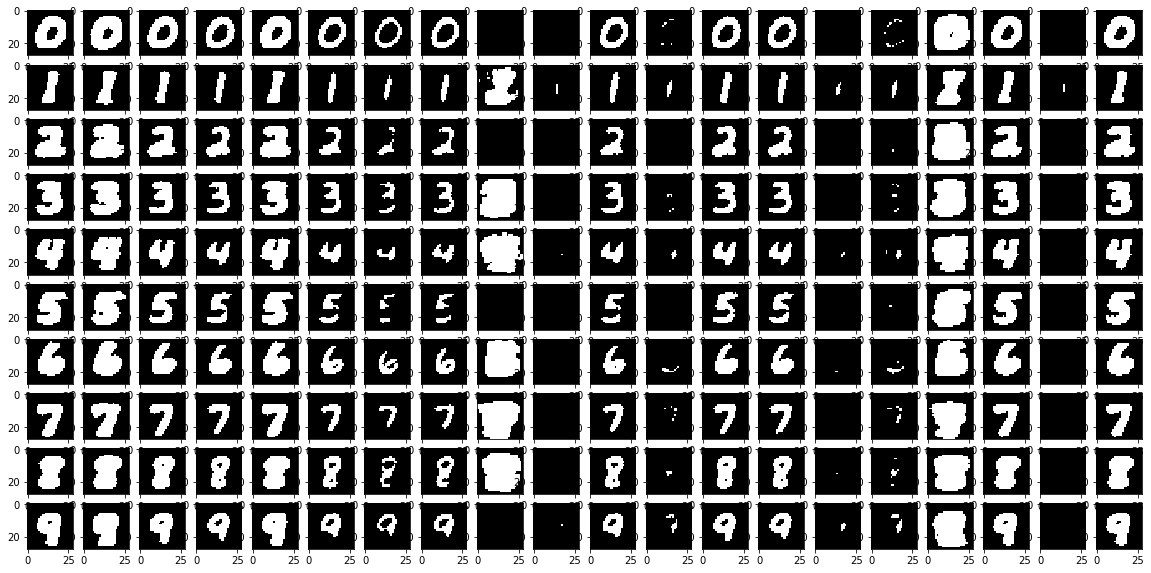

In [371]:
def P10(num_examples):

## STUDENT START ###=
    zero = []
    on = []
    two = []
    three = []
    four = []
    five = []
    six = []
    seven = []
    eight = []
    nine = []

    for i in range(20):
        rand_int = np.random.rand()
    #     binarize = rand_int??
        bnb1 = BernoulliNB()
        y = bnb1.fit(mini_train_data, mini_train_labels)
        prob = np.exp(y.feature_log_prob_)
    #     print(prob)
        one = np.array(prob > rand_int)
        one = one + 0
#         print(one.shape)

        one_reshaped = []
        for i in range(len(one)):
            image = one[i]
            image = np.reshape(image, (28, 28))
            one_reshaped.append(image)
            
        on.append(one_reshaped[0])
        two.append(one_reshaped[1])
        three.append(one_reshaped[2])
        four.append(one_reshaped[3])
        five.append(one_reshaped[4])
        six.append(one_reshaped[5])
        seven.append(one_reshaped[6])
        eight.append(one_reshaped[7])
        nine.append(one_reshaped[8])
        zero.append(one_reshaped[9])

    nums = np.concatenate((on, two, three, four, five, six, seven, eight, nine, zero), axis = 0)    
    
    plt.figure(figsize=(20, 20))
    for i in range(len(nums)):
        plt.subplot(20, 20, i+1)
        plt.imshow(nums[i])
        plt.rc('image', cmap='gray')
    
    
#     y_pred = bnb1.predict(dev_data)
#     y_true = dev_labels
#     y_acc = y_pred == y_true
#     acc = np.average(y_acc)
#     print(acc)
    
    

## STUDENT END ###

P10(20)

ANSWER: We can see that the images differ from the training images in that they are less distinguishable since they have very bold lines (because each pixel is either a 0 or 1 but not something in between). Furthermore, we can see that since we are comparing to randomly generated value between 0 and 1, we sometimes have digits that are very difficult to see anything. This would happen for randomly generated numbers closer to 1, since then very few of the pixels will have probabilities greater than the randomly generated number. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [435]:
def P11(buckets, correct, total):
    
## STUDENT START ###
    bnb1 = BernoulliNB(alpha = 0.001, binarize = 0)
    bnb1.fit(mini_train_data, mini_train_labels)
    y_true = dev_labels
    y_pred = bnb1.predict(dev_data)
    y_pred1 = np.array(y_pred, dtype = int)
    preds_dist = bnb1.predict_proba(dev_data)
    preds = []
    for i in range(len(preds_dist)):
        p = preds_dist[i]
        maxp = np.max(p)
        preds.append(maxp)

    bucketvals = [[] for bucket in buckets]
    for i in range(len(y_pred1)):
        pred = preds[i]
        yp = y_pred[i]
        ya = dev_labels[i]
        if pred < buckets[0]:
            bucketvals[0].append(pred)
            total[0] += 1
            if (yp == ya):
                correct[0] += 1
        elif pred < buckets[1]:
            bucketvals[1].append(pred)
            total[1] += 1
            if (yp == ya):
                correct[1] += 1
        elif pred < buckets[2]:
            bucketvals[2].append(pred)
            total[2] +=1
            if (yp == ya):
                correct[2] += 1
        elif pred < buckets[3]:
            bucketvals[3].append(pred)
            total[3] +=1
            if (yp == ya):
                correct[3] += 1
        elif pred < buckets[4]:
            bucketvals[4].append(pred)
            total[4] +=1
            if (yp == ya):
                correct[4] += 1
        elif pred < buckets[5]:
            bucketvals[5].append(pred)
            total[5] +=1
            if (yp == ya):
                correct[5] += 1
        elif pred < buckets[6]:
            bucketvals[6].append(pred)
            total[6] +=1
            if (yp == ya):
                correct[6] += 1
        elif pred < buckets[7]:
            bucketvals[7].append(pred)
            total[7] +=1
            if (yp == ya):
                correct[7] += 1
        elif pred <= buckets[8]:
            bucketvals[8].append(pred)
            total[8] +=1
            if (yp == ya):
                correct[8] += 1
            
                
## STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER: This is strongly calibrated since we can derive from the table that is printed that there is a positive correlation between posterior probability and accuracy. Furthermore, it is higher for when the posterior probability of the predicted class is 0.9 than that for 0.8 posterior probability. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()